# Context

Mobile phones emit microwaves, and so holding one next to your brain for large parts of the day is a bit like sticking your brain in a microwave oven and pushing the “cook until well done” button. If we wanted to test this experimentally, we could get six groups of people and strap a mobile phone on their heads, then by remote control turn the phones on for a certain amount of time each day [^1]. After six months [^2], we measure the size of any tumour (in mm<sup>3</sup>) close to the site of the phone antenna (just behind the ear). The six groups experienced 0, 1, 2, 3, 4, or 5 hours per day of phone microwaves for 6 months [^3]. Do tumours significantly increase with greater daily exposure? The data are in `tumour.sav`. 

[^1]: Again, the IRB would never let this happen. Also, that makes people look more stupid than the TOEFL headphone man. 
[^2]: The research team must paid the participants a lot. You have such number of participants and you dress them stupid, and they never quit. This may happen in two places: Researcher's Disneyland, or DPRK. 
[^3]: Even people in the *square-cabin hospital* received better treatment than this experiment. 

# Objectives

1. For each group draw a histogram showing the distribution of tumour sizes.
2. Test the hypothesis that the amount of daily exposure to phone microwaves does not affect the size of the tumour. In the meantime, test these two hypotheses using contrasts:
    1. Exposure to phone microwaves does not lead to different mean tumour size. (compare 0 vs. 1 to 5 combined)
    2. The mean tumour size is a linear function of the number of hours per day of phone microwave exposure. (test the linear trend)

    Write a short paragraph to summarize your findings.
3. Compare the means of all pairs of groups using the Tukey HSD test. Briefly summarize your findings.
4. Draw boxplots of tumour sizes against groups. Do you think the plots agree with your findings in the previous two questions?
5. Are any assumptions of ANOVA violated? Do you think what you did in the previous questions was appropriate?

# Solutions

## Q1: Histogram of Tumour Sizes

See @fig-histo-tumour-grid. 

In [ ]:
#| echo: false

import pandas as pd
tumour_df = pd.read_spss('./datasets/tumour.sav')

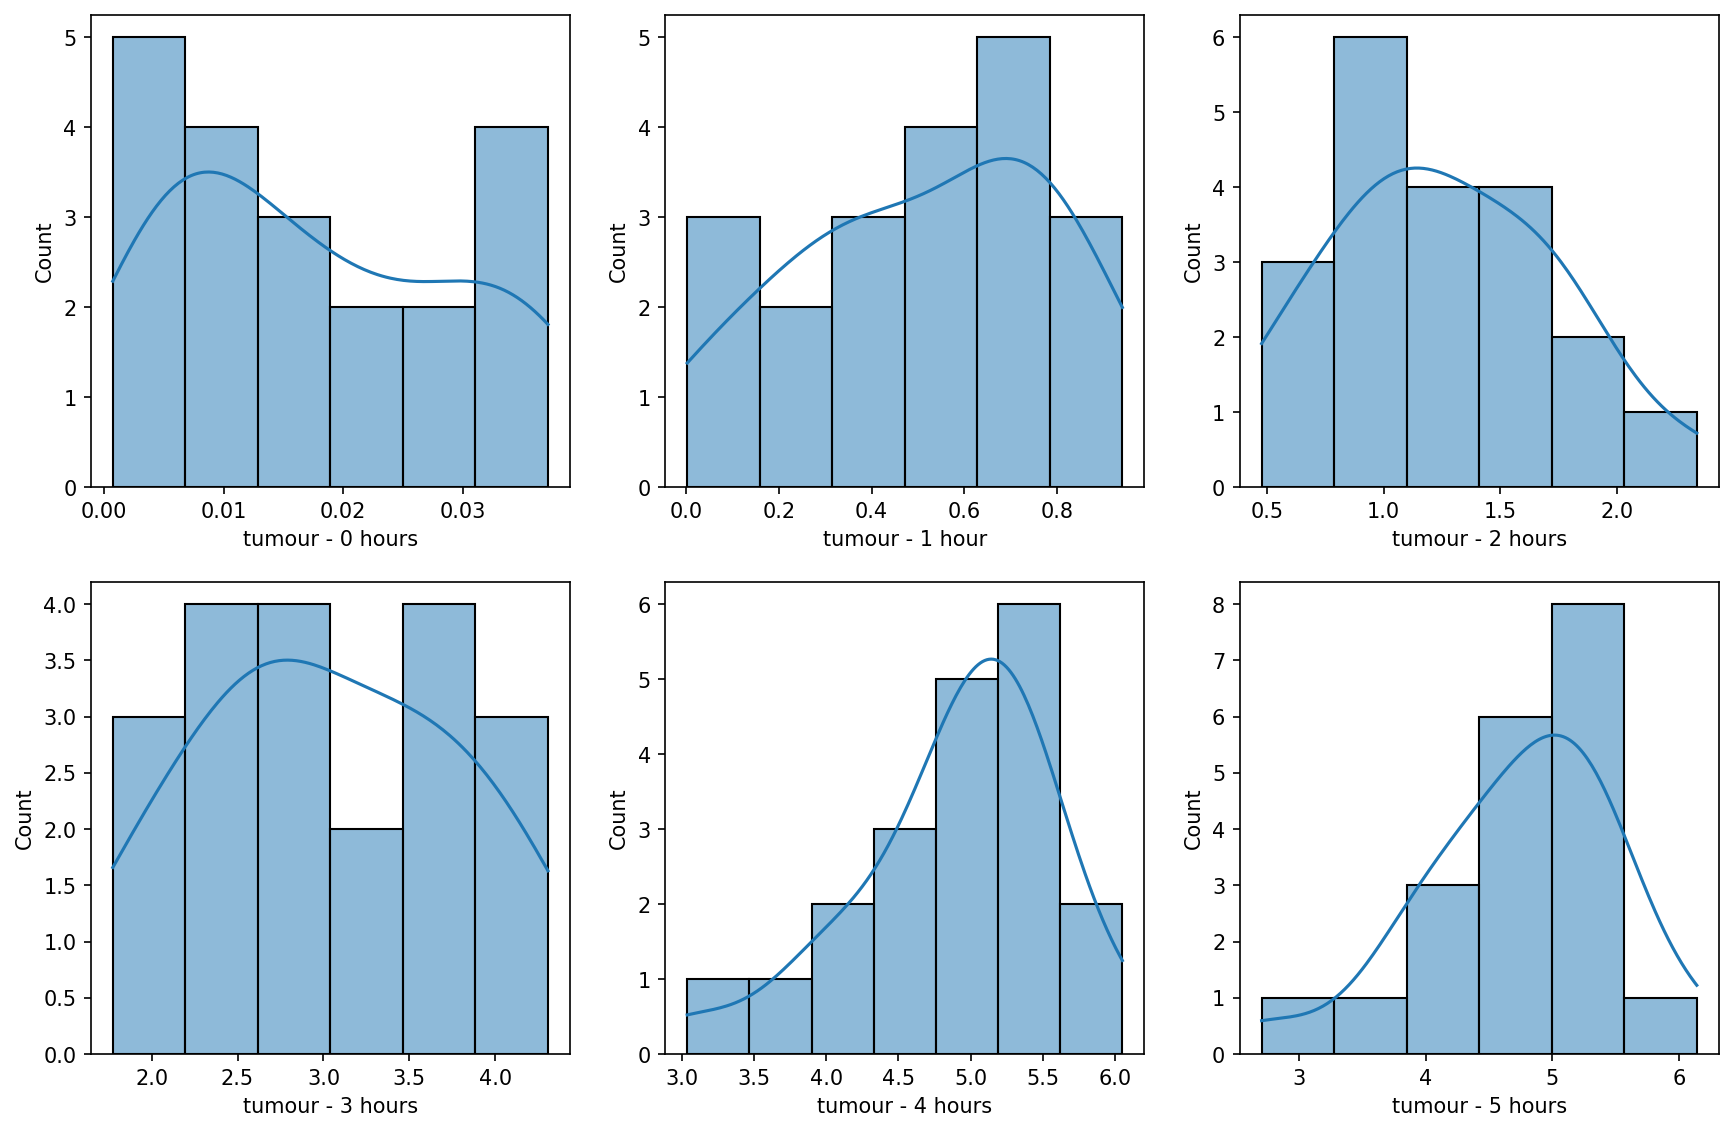

In [ ]:
#| echo: false
#| label: fig-histo-tumour-grid
#| fig-cap: Distribution of tumour sizes per group. 

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2,3)
sns.histplot(tumour_df[tumour_df['usage'] == '0 hours'], x='tumour', kde=True, ax=ax[0, 0]).set_xlabel('tumour - 0 hours')
sns.histplot(tumour_df[tumour_df['usage'] == '1 hour'], x='tumour', kde=True, ax=ax[0, 1]).set_xlabel('tumour - 1 hour')
sns.histplot(tumour_df[tumour_df['usage'] == '2 hours'], x='tumour', kde=True, ax=ax[0, 2]).set_xlabel('tumour - 2 hours')
sns.histplot(tumour_df[tumour_df['usage'] == '3 hours'], x='tumour', kde=True, ax=ax[1, 0]).set_xlabel('tumour - 3 hours')
sns.histplot(tumour_df[tumour_df['usage'] == '4 hours'], x='tumour', kde=True, ax=ax[1, 1]).set_xlabel('tumour - 4 hours')
sns.histplot(tumour_df[tumour_df['usage'] == '5 hours'], x='tumour', kde=True, ax=ax[1, 2]).set_xlabel('tumour - 5 hours')
fig.set_size_inches(14, 9)
fig.set_dpi(150)

plt.show()


## 

Contrast 1 (0 vs 1-5 hours):
t-statistic: -6.774755644773891, p-value: 5.175015172968741e-10

Linear Trend Test:
<F test: F=749.4658135633815, p=6.0312860025889e-53, df_denom=118, df_num=1>

Tukey HSD Test:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.4973  0.079 -0.0326 1.0272  False
     0      2   1.2438    0.0  0.7139 1.7737   True
     0      3    3.004    0.0  2.4741 3.5339   True
     0      4   4.8702    0.0  4.3404 5.4001   True
     0      5    4.713    0.0  4.1831 5.2429   True
     1      2   0.7465 0.0011  0.2166 1.2764   True
     1      3   2.5067    0.0  1.9768 3.0366   True
     1      4   4.3729    0.0   3.843 4.9028   True
     1      5   4.2157    0.0  3.6858 4.7456   True
     2      3   1.7602    0.0  1.2303 2.2901   True
     2      4   3.6264    0.0  3.0965 4.1563   True
     2      5   3.4692    0.0  2.9393 3.9991   True
     3      4

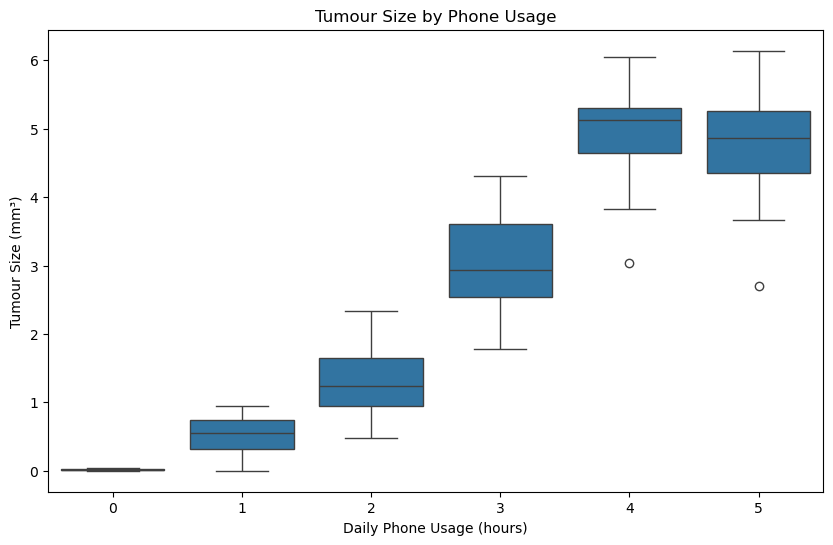


Shapiro-Wilk Normality Test:
{0: 0.05538061632083743, 1: 0.3800832267758608, 2: 0.8814430334064678, 3: 0.6668401641540753, 4: 0.13014447735734735, 5: 0.54306652101047}


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [121]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Read the data
data = pd.read_spss('./datasets/tumour.sav')  # or appropriate method to read .sav
data['usage'] = data['usage'].str.extract('(\d+)').astype(int)

# Q2: Hypothesis Testing with Contrasts
def custom_contrasts(data):
    # Contrast 1: 0 hours vs 1-5 hours combined
    group_0 = data[data['usage'] == 0]['tumour']
    group_other = data[data['usage'] != 0]['tumour']
    
    t_stat, p_value = stats.ttest_ind(group_0, group_other)
    print("Contrast 1 (0 vs 1-5 hours):")
    print(f"t-statistic: {t_stat}, p-value: {p_value}")
    
    # Contrast 2: Linear trend
    model = ols('tumour ~ usage', data=data).fit()
    linear_trend = model.f_test('usage')
    print("\nLinear Trend Test:")
    print(linear_trend)

# Q3: Tukey HSD Test
def tukey_test(data):
    tukey = pairwise_tukeyhsd(data['tumour'], data['usage'])
    print("\nTukey HSD Test:")
    print(tukey)

# Q4: Boxplot
def create_boxplot(data):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='usage', y='tumour', data=data)
    plt.title('Tumour Size by Phone Usage')
    plt.xlabel('Daily Phone Usage (hours)')
    plt.ylabel('Tumour Size (mm³)')
    plt.show()

# Q5: ANOVA Assumptions Check
def check_anova_assumptions(data):
    # Normality test for each group
    normality_tests = {}
    for group in data['usage'].unique():
        group_data = data[data['usage'] == group]['tumour']
        _, p = stats.shapiro(group_data)
        normality_tests[group] = p
    
    print("\nShapiro-Wilk Normality Test:")
    print(normality_tests)
    
    # Levene's test for homogeneity of variances
    groups = [group for group in data['tumour'].groupby(data['usage'])]
    # levene_stat, levene_p = stats.levene(*groups)
    # 
    # print("\nLevene's Test for Homogeneity of Variances:")
    # print(f"Statistic: {levene_stat}, p-value: {levene_p}")
    
    # One-way ANOVA
    f_stat, anova_p = stats.f_oneway(*groups)
    print("\nOne-way ANOVA:")
    print(f"F-statistic: {f_stat}, p-value: {anova_p}")

# Run all analyses
custom_contrasts(data)
tukey_test(data)
create_boxplot(data)
check_anova_assumptions(data)

# Final thoughts: Strap, phone, and head

Based on my personal knowledge, I only have seen this senerio: a person, a device straped on their body, a remote control turning this device on and off -- in some ... motion pictures usually stored in a hidden folder called `learning-materials` or 学习资料)`. 